# 🛡️ Survival First: A Beginner's Guide to Not Blowing Up
### Why managing your money matters more than picking the "right" Bitcoin price.

Most people approach trading like a lottery: they look for a "signal" to buy, go "all-in," and hope for the best. This notebook is designed to show you why that approach is mathematically guaranteed to fail over time.

Before we learn how to make money, we must learn **how to stay in the game.**

---

## 0️⃣ How to Read This Notebook
This is not a guide on how to predict the price of Bitcoin. Instead, it is a guide on how to handle **uncertainty**. 

### The Three Golden Rules:
1.  **Work in Percentages:** Dollars are distracting. Percentages are how you measure growth and risk.
2.  **Think in Paths:** Don't ask "Will I be right?" Ask "What happens to my account if I'm wrong 5 times in a row?"
3.  **Survival > Excitement:** If your trading feels like a roller coaster, you are doing it wrong. Professional trading is intentionally boring.

> **Our Goal:** To understand the "Math of Ruin" so you can trade for years, not days.

## 1️⃣ Why "Expected Value" is a Mathematical Trap

In school, we are taught to look at the **Average (Expected Value)**. If the average is positive, it is considered a "good" bet. In trading, this logic is the fastest way to go bankrupt.

### The Conflict: Math vs. Reality
* **The Math (Additive):** If you imagine playing a game 1,000 times simultaneously, the "average" result looks great.
* **The Reality (Multiplicative):** In real life, you don't play 1,000 times at once. You play **one after another**. If you hit zero on trade \#5, you never get to see trade \#6.

### Example: The "Suicide" Lottery
Imagine a bet with these odds:
* **99.9% chance:** You double your money (\\$1,000 becomes \\$2,000).
* **0.1% chance:** You lose everything (\\$1,000 becomes \$0).

**The Average (Expected Value):** \$1,998. 
Mathematically, this is an incredible "deal." But if you keep playing this game, **you are guaranteed to hit zero eventually.**



### The Lesson
Expected Value tells you what happens in a "perfect world" where you have infinite money and infinite time. But your wealth evolves **multiplicatively**. Because $\$1,000 \times 0 = 0$, a single "ruin" event (losing everything) cancels out every win you've ever had.

> **Key Takeaway:** We don't care about the "average" return. We care about the return we can actually achieve **without ever hitting zero.**

## 2️⃣ The "Recovery Gap": Why Losing 50% is a Disaster

If you have \\$100 and lose 10%, you have \\$90. To get back to \$100, you need an 11% gain. That feels fair and manageable.

However, as losses get bigger, the "math of recovery" becomes your enemy. This happens because every loss leaves you with less "fuel" (capital) to make the next gain. The relationship is **non-linear**: the deeper the hole, the steeper the climb.

| If you lose... | You need to gain... | Effort Level |
| :--- | :--- | :--- |
| 10% | 11% | Easy |
| 25% | 33% | Doable |
| **50%** | **100%** | **Extremely Hard** |
| 80% | 400% | Near Impossible |
| 95% | 1900% | Lottery Territory |



### The Lesson: The Asymmetry of Loss
In trading, a 50% drop is not "halfway" to zero; it is a mathematical cliff. It requires you to **double** your remaining money just to break even. 

> **Rule of Thumb:** It is 10x easier to *prevent* a 50% loss than it is to *generate* a 100% gain to recover from it.

## 3️⃣ What is "Drawdown" and "Ruin"?

Before we look at the charts, we need to define our "failure" conditions. 

### 1. Drawdown
A **Drawdown** is the "pain" measured from the highest point your account ever hit (the Peak) to the current low point. It tells you how far you have fallen from your best day.

$$\text{Drawdown} = \frac{\text{Peak Value} - \text{Current Value}}{\text{Peak Value}}$$

### 2. Ruin
In the world of math, "Ruin" usually means hitting $0. But in the world of professional trading, **Ruin is hitting a level you cannot emotionally or mathematically recover from.**

In this notebook, we define **Ruin as a 40% drawdown.**

#### The Probability of Ruin Formula
To calculate the likelihood that you will hit your Ruin threshold before reaching your profit goal, we use the **Risk of Ruin (RoR)** formula:

$$RoR = \left( \frac{1 - \text{Edge}}{1 + \text{Edge}} \right)^N$$

* **Edge**: Your advantage over the market (e.g., if you win 52% of the time, your edge is 0.52-0.48= 0.04 or 4%).
* **N**: The number of "units" of risk you have in your account before you hit your Ruin threshold. 

**Why $N$ is the most important variable:**
If you have \\$1,000 and your Ruin point is \$600, you have **\$400** of "life" in your account. 
* If you risk **\$100** per trade, $N = 4$. Your $RoR$ will be very high because a short string of bad luck ends your career.
* If you risk **\$10** per trade, $N = 40$. Your $RoR$ drops toward zero because you have enough "fuel" to survive natural statistical swings.



#### Why 40% is our "Uncle Point"?
* **The Math:** As we saw in the previous cell, once you lose 40%, you need a 67% gain just to get back to zero.
* **The Psychology:** Most beginners quit, panic-trade, or lose sleep long before they hit a 100% loss.

> **Our Objective:** We want to grow our account, but our **primary goal** is to keep the probability of a 40% drawdown as close to zero as possible by ensuring our $N$ (units of risk) is large enough to survive any streak of bad luck.

## 4️⃣ The Trading Simulation: Setting the Rules

To see the "Math of Ruin" in action, we are going to build a **Bitcoin Toy Model**. We aren't going to look at actual price charts yet; instead, we are going to simulate the *results* of a trading strategy over one year.

### Our Assumptions:
* **The Frequency:** We take exactly **one trade per day** (365 trades total).
* **The "Edge":** We have a **55% win rate**. This means we are slightly better than a coin flip—this is a realistic edge for a disciplined trader.
* **The Payout:** When we win, the price moves **+2%**. When we lose, the price moves **-2%**. 
* **The Cost:** We subtract a **0.15% fee** on every trade. This represents what you pay to the exchange (like Binance or Coinbase).

### The Big Question:
If two traders have the exact same strategy and the exact same win rate, but one "bets" more of their account than the other... **who ends up wealthier?**

> In the next cell, we define a Python function that will let us test different "Position Sizes" (how much of our wallet we put into each trade).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- SESSION STATE VARIABLES ---
# We store our settings in a dictionary so they persist throughout the notebook.
config = {
    "starting_capital": 1000,
    "trades_count": 365,     # One year of daily trading
    "win_rate": 0.52,        # 55% chance of a winning trade
    "win_amount": 0.02,      # +2% gain on wins
    "loss_amount": -0.02,    # -2% loss on losses
    "ruin_threshold": 0.40,  # 40% loss = "Game Over"
    "fee_per_trade": 0.0015  # 0.15% round-trip fee (Standard exchange fee)
}

def run_simulation(sizing_fraction):
    """
    Simulates a year of trading based on a specific % of capital risked per trade.
    sizing_fraction: The % of your total wallet you use for each trade (e.g., 0.10 for 10%).
    """
    capital = [config["starting_capital"]]
    
    for _ in range(config["trades_count"]):
        current_cap = capital[-1]
        
        # If the trader hits zero, they can't play anymore
        if current_cap <= 1:
            capital.append(0)
            continue
            
        # Determine if this trade is a win or a loss
        if np.random.rand() < config["win_rate"]:
            # Profit = (Position Size * 2% Gain)
            result = (current_cap * sizing_fraction * config["win_amount"])
        else:
            # Loss = (Position Size * 2% Loss)
            result = (current_cap * sizing_fraction * config["loss_amount"])
            
        # Fees: You pay these on the total size of your position, win or lose.
        fees = (current_cap * sizing_fraction * config["fee_per_trade"])
        
        new_cap = current_cap + result - fees
        capital.append(max(new_cap, 0)) 
        
    return np.array(capital)

print("✅ Trading environment initialized.")
print(f"Starting Capital: ${config['starting_capital']}")
print(f"Edge: {config['win_rate']*100}% win rate.")

✅ Trading environment initialized.
Starting Capital: $1000
Edge: 52.0% win rate.


# 5️⃣ The Tale of Three Traders

To see how position sizing affects your survival, let's look at three traders who have the exact same strategy (55% win rate) but different risk appetites:

1.  **The Reckless Trader (Risks 100%):** Goes "All-In" every single time. 
2.  **The Aggressive Trader (Risks 25%):** Wants high growth and is willing to take big swings.
3.  **The Conservative Trader (Risks 10%):** Focuses on staying in the game and growing slowly.

### What are we looking for?
We aren't just looking at who has the most money at the end. We are looking at the **path** they took to get there. Did they hit our "Ruin" threshold (a 40% drop)? Did they experience a "heart attack" drawdown that would make a normal person quit?

> **Note:** With starting capital **\$1,000**, our Ruin threshold is  **\$600** (a 40% loss).

In [4]:
# Number of "Universes" to simulate
simulations = 1000
trades = config["trades_count"]

def get_monte_carlo_results(sizing_fraction):
    final_balances = []
    ruin_count = 0
    
    for _ in range(simulations):
        cap = run_simulation(sizing_fraction)
        final_balances.append(cap[-1])
        
        # Check if the path ever dropped below the Ruin Threshold ($600)
        if np.min(cap) <= (config["starting_capital"] * (1 - config["ruin_threshold"])):
            ruin_count += 1
            
    return np.array(final_balances), (ruin_count / simulations) * 100

# Let's test 100% (Reckless) vs 10% (Aggressive) vs 2% (Conservative)
reckless_results, reckless_ruin = get_monte_carlo_results(1.0)
aggressive_results, aggressive_ruin = get_monte_carlo_results(0.5)
conservative_results, conservative_ruin = get_monte_carlo_results(0.1)

print(f"--- RESULTS AFTER {simulations} SIMULATIONS ---")
print(f"Reckless (100%): Median Final Balance: ${np.median(reckless_results):.2f} | Risk of Ruin: {reckless_ruin}%")
print(f"Aggressive (10%): Median Final Balance: ${np.median(aggressive_results):.2f} | Risk of Ruin: {aggressive_ruin}%")
print(f"Conservative (2%): Median Final Balance: ${np.median(conservative_results):.2f} | Risk of Ruin: {conservative_ruin}%")

--- RESULTS AFTER 1000 SIMULATIONS ---
Reckless (100%): Median Final Balance: $725.67 | Risk of Ruin: 43.7%
Aggressive (10%): Median Final Balance: $850.42 | Risk of Ruin: 4.3999999999999995%
Conservative (2%): Median Final Balance: $974.84 | Risk of Ruin: 0.0%


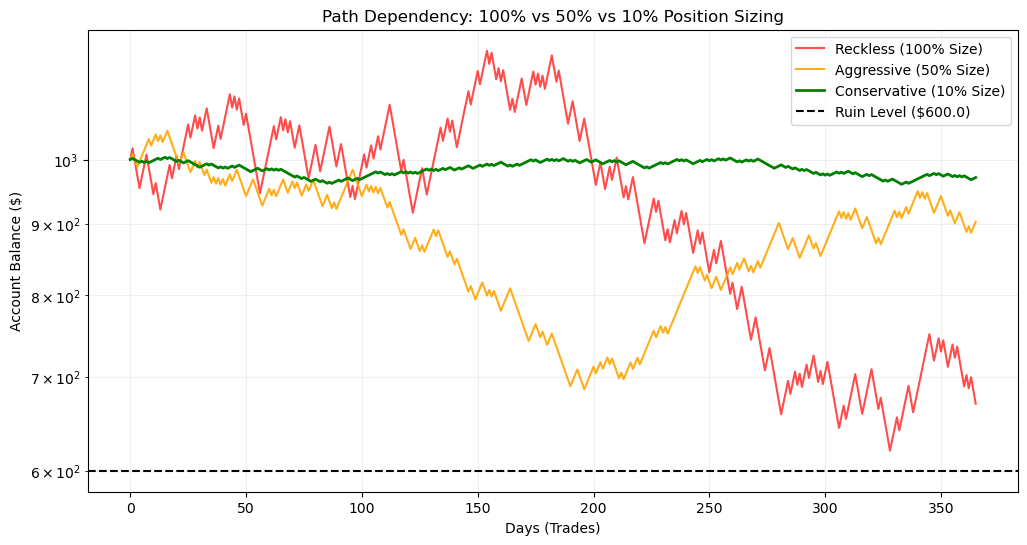

Final Balances after 365 trades:
Conservative (10%): $970.95
Aggressive (50%): $903.05
Reckless (100%): $669.79


In [5]:
# Reset random seed so we all see the same "universe"
np.random.seed(42)

# Run the simulations based on % of capital used per trade
# 1.0 = 100% (All-in), 0.5 = 50%, 0.1 = 10%
reckless = run_simulation(1.0)      
aggressive = run_simulation(0.5)    
conservative = run_simulation(0.1)  

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(reckless, label='Reckless (100% Size)', color='red', alpha=0.7)
plt.plot(aggressive, label='Aggressive (50% Size)', color='orange', alpha=0.9)
plt.plot(conservative, label='Conservative (10% Size)', color='green', linewidth=2)

# Add the Ruin Threshold line ($1,000 - 40% = $600)
ruin_level = config["starting_capital"] * (1 - config["ruin_threshold"])
plt.axhline(y=ruin_level, color='black', linestyle='--', label=f'Ruin Level (${ruin_level})')

plt.title("Path Dependency: 100% vs 50% vs 10% Position Sizing")
plt.xlabel("Days (Trades)")
plt.ylabel("Account Balance ($)")
plt.yscale('log') # Log scale is essential for viewing multiplicative growth
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

print(f"Final Balances after 365 trades:")
print(f"Conservative (10%): ${conservative[-1]:.2f}")
print(f"Aggressive (50%): ${aggressive[-1]:.2f}")
print(f"Reckless (100%): ${reckless[-1]:.2f}")

#### 7️⃣ The "Hidden Killer": Fees and the Death of a Thin Edge

Look closely at the Monte Carlo results we just generated. There is a sobering reality here: **Every single trader, on average, lost money.
* **Conservative (2%):** Median balance ~\$970.
* **Aggressive (10%):** Median balance ~\$867.
* **Reckless (100%):** Median balance ~\$725.

### Why is everyone losing?
Our "Edge" (52% win rate) is simply too small to overcome the **0.15% trading fee** over 365 trades. We are winning more often than we lose, but we are paying the exchange more than we are taking from the market. This is the reality of many "break-even" strategies.

### The Difference Between a "Bleed" and a "Blow Up"
While everyone is losing, they aren't losing the same way:
1.  **The Conservative Trader** is experiencing a "Slow Bleed." They are down 3%, but they are still in the game. They have time to improve their strategy.
2.  **The Reckless Trader** is facing a "Death Blow." On top of losing money to fees, they have a **~44% chance of hitting the Ruin threshold ($600).** 
> **The Lesson:** Fees turn a "thin" win rate into a losing game. But **bad position sizing** turns a losing game into a total wipeout. You can recover from a slow bleed by finding a better strategy (Alpha). You cannot recover from Ruin.

## 8️⃣ Log-Growth: Why professionals don't just "Average" their returns

Since we saw that even a 52% win rate can lead to a "slow bleed" because of fees, we need a better way to measure our success. 

Instead of looking at the **Expected Value** (the average dollar amount), professional traders look at **Expected Log-Growth**.

### Why use Logarithms?
In math, the logarithm of zero is **negative infinity**. By using "Log-Growth" to measure your strategy, you are mathematically treating "hitting zero" as the worst possible outcome—worse than any potential profit is good.

* **Linear Thinking:** "I made an average of \$10 per trade."
* **Logarithmic Thinking:** "My account is growing at a compound rate that is sustainable and safe from ruin."



### Matching the "Survival" Goal
When we maximize **$E[\log W]$** (the expected log of our wealth), we are automatically choosing a position size that:
1. Prevents us from hitting zero (Ruin).
2. Account for the "drag" of fees and volatility.
3. Maximizes the long-term compound growth of the account.

> **Next step:** We will introduce the **Kelly Criterion**, which is the specific formula used to find this "Log-Optimal" bet size so you never have to guess again.

## 9️⃣ The Kelly Criterion: Finding the "Optimal" Size

Now that we know we need to maximize **Log-Growth** to survive, how do we actually calculate the "perfect" percentage to risk? 

The **Kelly Criterion** is the mathematical answer. It is a formula used by professional gamblers and hedge fund managers to find the "sweet spot" between betting too little (growing too slowly) and betting too much (hitting Ruin).

### The General Formula
In the real world, wins and losses aren't always equal. The general formula for the optimal fraction ($f^*$) of your capital to risk is:

$$f^* = \frac{bp - q}{b}$$

Where:
* **$b$**: The odds received on the wager (the ratio of the amount you can win to the amount you can lose). For example, if you risk \$1 to win \$3, $b=3$.
* **$p$**: The probability of winning.
* **$q$**: The probability of losing ($1 - p$).

### Our Simplified Case
In our Bitcoin "Toy Model," we assume a **1:1 Risk/Reward ratio**. This means we win 2% or lose 2% (therefore, $b=1$). When the potential win equals the potential loss, the formula simplifies to the version often used in binary betting:

$$f^* = p - q$$

* **If your win rate is 52%:** $0.52 - 0.48 = 0.04$ (Risk 4%).
* **If your win rate is 55%:** $0.55 - 0.45 = 0.10$ (Risk 10%).



### The "Full Kelly" Warning
While $f^*$ is the "mathematically optimal" size to maximize growth, you should **almost never** use the full amount. Here is why:
1. **Model Error:** You might think you have a 52% win rate, but you might actually have 50.5%. Full Kelly is highly sensitive to these small errors.
2. **Fat Tails:** Crypto is famous for "Flash Crashes" that are much larger than our 2% model. Kelly assumes a stable distribution.
3. **The Cliff:** Any more than the Kelly fraction ($f^*$), and your long-term growth rate becomes negative—meaning that given enough time, ruin becomes a mathematical certainty.

**The Pro Secret:** Most successful traders use **"Fractional Kelly"**. They take the calculated $f^*$ and divide it by 2 (Half-Kelly) or 4 (Quarter-Kelly) to ensure survival through periods of bad luck.

# 🔟 Fractional Kelly: The Professional's Safety Net

Now we see the trap: For a **52% win rate**, the math says the "optimal" size (Full Kelly) is only **4%**. 

In our earlier simulation, even our "Conservative" trader was risking **10%**. This means even the "safe" trader was actually betting way *more* than the mathematical peak! This explains why it struggled to make significant headway against the fees.

### Why Professionals Use "Half" or "Quarter" Kelly
If the math says 4% is "optimal," a professional crypto trader will usually risk only **1% (Quarter Kelly)**. 

**Why cut the size so drastically?**
1. **The Error Buffer:** If your 52% win rate is actually 51% this month, a 4% bet size will start losing money rapidly. A 1% size keeps you alive.
2. **Reduced Volatility:** Full Kelly growth is a "roller coaster." Cutting your size in half reduces the "pain" (drawdowns) by 50% while only slowing down growth by a small fraction.
3. **Psychological Peace:** It is much easier to stay disciplined when your account drops 1% than when it drops 10%.



**The Pro Rule:** If the math tells you to bet 4%, bet 1%. You will survive the "Black Swan" events that wipe everyone else out, and you will still be there to compound your wins over the long run.

## 1️⃣1️⃣ Practical Checklist: The Beginner-Safe Framework

Now that you've seen the math, you know that **Position Sizing** is the engine of your survival. Before you take any trade on an exchange like Binance or Coinbase, you should run through this checklist to ensure you aren't accidentally playing the "Reckless Trader" game.

### ✅ The 5-Step Survival Check
1. **Define Max % Risk per Trade:** Based on the Kelly math, decide on a fractional size (e.g., 1% or 2% of your total wallet). 
2. **Define Max Drawdown:** What is your "uncle point"? (e.g., "If I lose 20%, I stop and re-evaluate everything.")
3. **Include Fees:** Always assume you are starting the trade with a 0.15% to 0.20% loss. If your "target profit" is only 0.20%, you are trading for the exchange, not yourself.
4. **Calculate Position Size:** Use your wallet balance to find the dollar amount. 
   * *Example:* \\$1,0000 balance $\times$ 1% risk = \\$100 position size.
5. **Distance to Stop-Loss:** Know exactly where you will exit if the price goes against you.



### The Golden Rule
Trading is not about predicting price.
It is about managing uncertainty over time.

##  Simulating the Quarter-Kelly Rule in Practice

Now that we have introduced the **“Pro Rule” — Quarter Kelly**, let’s see how it behaves in a realistic trading environment.

We will simulate a trader who **risks exactly 1% of their capital per trade**, which corresponds to **Quarter Kelly for a 52% edge** in our simplified win/loss model.

To understand how *skill* (edge) changes outcomes, we will compare **three parallel universes**.  
Everything is identical except the trader’s **win rate**.

---

###  Universe 1: The Beginner  
**Win Rate: 52%**

- Represents a **very thin edge**
- Typical for a new trader who has just become slightly profitable
- Growth exists, but volatility and drawdowns matter a lot

---

###  Universe 2: The Intermediate  
**Win Rate: 55%**

- A **solid, disciplined strategy**
- Strong enough to compound meaningfully over time
- Drawdowns are manageable with proper position sizing

---

###  Universe 3: The Pro  
**Win Rate: 60%**

- An **exceptional and rare edge**
- Extremely difficult to sustain in real markets
- Demonstrates the explosive power of compounding *when risk is controlled*

---

###  Key Question We Want to Answer

> **How much does a small improvement in edge matter when risk is kept constant?**

The simulation will reveal how:
- Growth accelerates non-linearly with edge
- Risk control prevents ruin
- Discipline matters more than prediction

Let’s simulate and compare the outcomes.


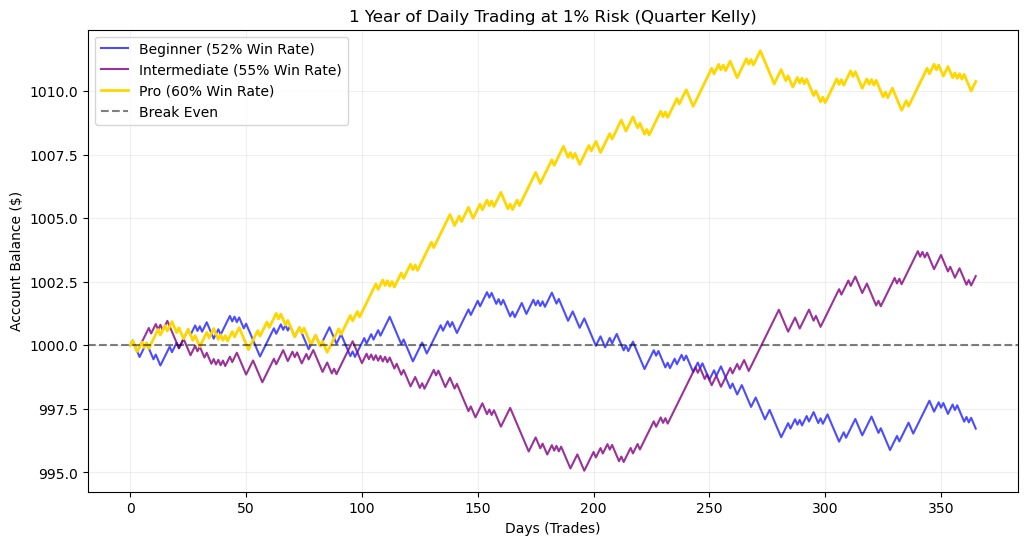

Final Balances after 365 days (starting with $1000):
Beginner (52%): $996.72
Intermediate (55%): $1002.72
Pro (60%): $1010.37


In [6]:
# Reset random seed for consistency
np.random.seed(42)

# Professional Sizing (1% of capital per trade)
pro_size = 0.01 

def simulate_with_edge(edge):
    # Temporarily update the edge in our config for this run
    original_edge = config["win_rate"]
    config["win_rate"] = edge
    results = run_simulation(pro_size)
    config["win_rate"] = original_edge # Reset config
    return results

# Run simulations
beginner_path = simulate_with_edge(0.52)
intermediate_path = simulate_with_edge(0.55)
pro_path = simulate_with_edge(0.60)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(beginner_path, label='Beginner (52% Win Rate)', color='blue', alpha=0.7)
plt.plot(intermediate_path, label='Intermediate (55% Win Rate)', color='purple', alpha=0.8)
plt.plot(pro_path, label='Pro (60% Win Rate)', color='gold', linewidth=2)

plt.axhline(y=config["starting_capital"], color='black', linestyle='--', alpha=0.5, label='Break Even')

plt.title("1 Year of Daily Trading at 1% Risk (Quarter Kelly)")
plt.xlabel("Days (Trades)")
plt.ylabel("Account Balance ($)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

print(f"Final Balances after 365 days (starting with $1000):")
print(f"Beginner (52%): ${beginner_path[-1]:.2f}")
print(f"Intermediate (55%): ${intermediate_path[-1]:.2f}")
print(f"Pro (60%): ${pro_path[-1]:.2f}")

## 1️⃣2️⃣ What Did We Learn From This Chart?

Look at the difference between this chart and our earlier "Reckless" chart. 

### 1. The Paths are "Smooth"
Because we only risked 1%, there are no heart-attack drops. Even the "Beginner" (who is losing slightly to fees) is doing so in a calm, controlled way. They have \$900+ left at the end of the year—plenty of "fuel" to keep learning.

### 2. The Power of the Edge
Notice how the gap between 55% and 60% is massive. This is because **Compounding** works best when you don't interrupt it with big losses. When you keep your risk small (1%), your "Edge" has the breathing room to actually work its magic.

### 3. Survival is the Prerequisite for Alpha
* The **Beginner** survived. They paid a "tuition fee" to the market but didn't blow up.
* The **Pro** turned a small edge into a significant profit without ever risking ruin.



**The Final Lesson:** If you trade with 100% risk, you are gambling on a single path. If you trade with 1% risk, you are investing in your own ability to become a better trader over time.

## 1️⃣3️⃣ The Professional Outcome: 60% Edge with Controlled Risk

If you look at the **Gold Line** in the previous chart, you are seeing the "Holy Grail" of trading. This is what happens when a trader combines a high-quality strategy (60% win rate) with disciplined, professional risk management (1% risk).

### Why the profit looks "small" to a beginner:
Beginners often expect to turn \\$1,000 into \\$10,000 in a year. To do that, you have to risk so much that your **Probability of Ruin** jumps to nearly 100%. 

### Why the Pro loves this chart:
* **The Math of Certainty:** With a 60% win rate and only 1% risk per trade, the probability of hitting a 40% drawdown (Ruin) is **statistically near zero.**
* **The "Smooth" Curve:** Unlike the Reckless trader whose account looks like a heart monitor, the Pro trader’s account moves in a steady, upward trajectory.
* **Compound Power:** Because the Pro never has to "recover" from a 50% loss, they never lose their momentum.



### The Reality Check
Reaching a 60% win rate in the live Bitcoin market is incredibly difficult. However, the lesson is clear: **Professional trading is about the long game.** If you can grow an account by 15-20% a year with **zero risk of blowing up**, you can eventually manage millions of dollars. If you double your money in a week but have a 45% risk of ruin, you will eventually have zero.

> **Takeaway:** The Pro isn't the one who makes the most money in a single day. The Pro is the one whose account is still growing 10 years later.

## 1️⃣1️⃣ Moving Toward Reality: From Symmetric to Asymmetric Returns

Up until this point, our "Toy Model" has assumed **Symmetric Returns**. This means we assumed that for every trade, your potential win was exactly the same size as your potential loss (2% up or 2% down).

While this was helpful for learning the basics of the Kelly Criterion, it isn't how professionals actually trade.

### The Problem with 1:1 Trading
In a symmetric 1:1 world, you are in a constant race against **fees**. Because you pay a "tax" on every trade, winning 50% of the time actually means you are losing money slowly. You have to be "right" significantly more than you are "wrong" just to keep your head above water.

### The "True Pro" Approach: Asymmetry
Professional traders focus on the **Risk/Reward Ratio**. They hunt for trades where the potential "upside" is much larger than the "downside." 



In the next simulation, we are going to change the rules:
1. **The Risk:** We still limit our loss to **2%**.
2. **The Reward:** We target a win of **6%**.
3. **The Ratio:** This is a **1:3 Risk/Reward ratio** (represented as $b=3$ in our Kelly formula).

By making our wins 3x larger than our losses, we change the math of the entire account. Let's see how this "Asymmetry" handles the same 60% win rate and 1% risk.

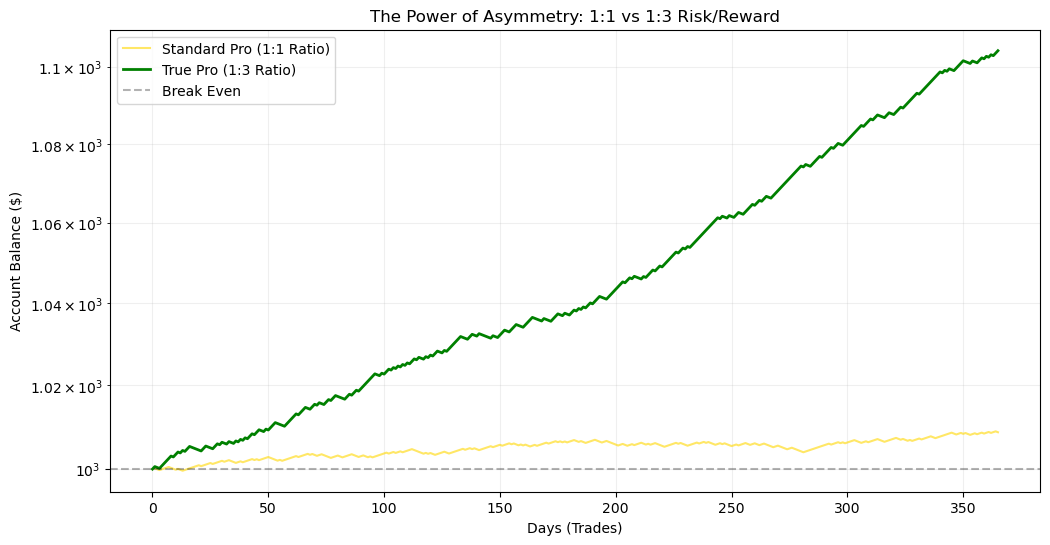

Final Balances (Starting $1000):
Standard Pro (1:1 Ratio): $1008.76
True Pro (1:3 Ratio): $1104.16


In [9]:
# Reset random seed for consistency
np.random.seed(42)

# Professional Sizing (1% of capital per trade)
pro_size = 0.01 

def run_asymmetric_simulation(edge, win_mult):
    """
    Simulates trading where a win is 'win_mult' times larger than a loss.
    win_mult: 3.0 means a 1:3 Risk/Reward ratio (Win 6%, Lose 2%).
    """
    capital = [config["starting_capital"]]
    
    for _ in range(config["trades_count"]):
        current_cap = capital[-1]
        if current_cap <= 1:
            capital.append(0)
            continue
            
        # Base loss is 2%
        loss_val = config["loss_amount"] # -0.02
        
        # Win is asymmetric (e.g., 2% * 3 = 6%)
        # This represents the 'b' in the general Kelly formula
        win_val = abs(config["loss_amount"]) * win_mult
        
        if np.random.rand() < edge:
            result = (current_cap * pro_size * win_val)
        else:
            result = (current_cap * pro_size * loss_val)
            
        # Fees are paid on the total position size
        fees = (current_cap * pro_size * config["fee_per_trade"])
        new_cap = current_cap + result - fees
        capital.append(max(new_cap, 0)) 
        
    return np.array(capital)

# Standard Pro: 60% Win Rate, 1:1 Risk/Reward (Win 2%, Lose 2%)
standard_pro = run_asymmetric_simulation(0.60, 1.0)

# True Pro: 60% Win Rate, 1:3 Risk/Reward (Win 6%, Lose 2%)
true_pro = run_asymmetric_simulation(0.60, 3.0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(standard_pro, label='Standard Pro (1:1 Ratio)', color='gold', alpha=0.6)
plt.plot(true_pro, label='True Pro (1:3 Ratio)', color='green', linewidth=2)
plt.axhline(y=1000, color='black', linestyle='--', alpha=0.3, label='Break Even')

plt.title("The Power of Asymmetry: 1:1 vs 1:3 Risk/Reward")
plt.xlabel("Days (Trades)")
plt.ylabel("Account Balance ($)")
plt.yscale('log') # Log scale shows the power of compounding
plt.legend()
plt.grid(True, which="both", alpha=0.2)
plt.show()

print(f"Final Balances (Starting $1000):")
print(f"Standard Pro (1:1 Ratio): ${standard_pro[-1]:.2f}")
print(f"True Pro (1:3 Ratio): ${true_pro[-1]:.2f}")

## 1️⃣3️⃣ Conclusion: The 10% Victory and the Trap of "More"

If you look at the **True Pro (Green Line)** in the graph above, you see a final balance of roughly **$1,104**. After 365 trades, that is a **10.4% annual return**. 

To a beginner, this might look disappointing. You might think, *"I came to Crypto to turn \\$1,000 into \\$100,000, not to make $104."* However, understanding why this 10% is a "Pro" result is what will save your account from inevitable ruin.

### 1. The Reality of 10%
A consistent 10% return with **near-zero risk of ruin** is the hallmark of a master trader. 
* **The S&P 500** averages about 10% per year.
* **Top Hedge Funds** often target 15-20% per year.
* **Compounding:** At 10% per year, your wealth doubles every 7 years without you ever having to worry about losing your "seed" capital.

### 2. The Danger Zone: Why 100% Returns are "Expensive"
If you want to make 100% in a year instead of 10%, the math forces you to change one of two things:
* **Increase your Risk:** Instead of putting 1%  of your money per trade, you risk 10% of it. 
* **The Result:** Your "Risk of Ruin" (the probability of hitting that 40% drawdown line) skyrockets from 0% to nearly 50%. You aren't "trading" anymore; you are flipping a coin on your financial future.

### 3. Professionalism is Scalability
The "True Pro" in our green line can manage **\\$1,000**, **\\$100,000**, or **\\$10,000,000** because their process is mathematically sound and emotionally calm. The "Reckless Trader" can only trade small amounts because their strategy is a roller coaster that eventually crashes.


---

### 🛡️ Your Final Trading Philosophy:
1. **Survival First:** If your account hits zero, you can't play. 1% risk is your shield.
2. **Accept the Math:** Fees and volatility are real. A 10% gain after fees is a massive win.
3. **Seek Asymmetry:** Don't work harder (more trades); work smarter (better Risk/Reward ratios).

**The goal isn't to get rich this month. The goal is to ensure that in 10 years, you are still in the game with a much larger account. Trading is not about predicting price.
It is about managing uncertainty over time.**